# Part 1:
Monte Carlo Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
np.random.seed(24)
num_simulations = 100
max_num_predictors = 100
num_observations = 50

In [ ]:
mean_r2_values = []
for num_predictors in range(1, max_num_predictors + 1):
    r2_values = []
    for _ in range(num_simulations):
        X = np.random.rand(num_observations, num_predictors)
        y = np.random.rand(num_observations)
        model = LinearRegression()
        model.fit(X, y)
        r2 = r2_score(y, model.predict(X))
        r2_values.append(r2)
    mean_r2_values.append(np.mean(r2_values))

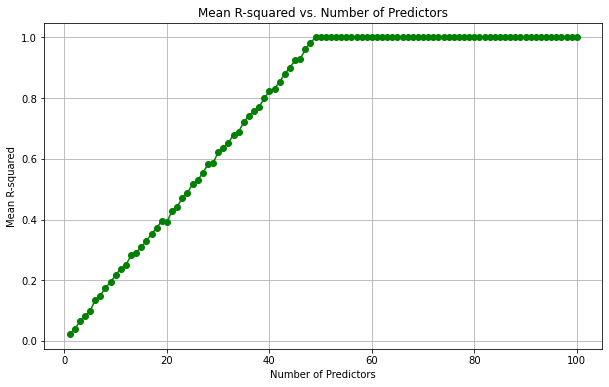

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_num_predictors + 1), mean_r2_values, marker='o', linestyle='-', color = 'green')
plt.title('Mean R-squared vs. Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Mean R-squared')
plt.grid(True)
plt.show()

# Part 4:
Implementation of Adjusted R_squared

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = pd.read_csv("./eyedata_features.csv")
X.drop('Unnamed: 0', axis = 1, inplace = True)
y = pd.read_csv("./eyedata_output.csv")
y.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
r2_scores = []
adj_r2_scores = []

for i in range(10,210,10):

    X_decomposed = X.iloc[:,:i]

    model = LinearRegression()

    model.fit(X_decomposed,y)

    y_pred = model.predict(X_decomposed)

    r2_scores.append(r2_score(y,y_pred))

    n = X_decomposed.shape[0]
    p = X_decomposed.shape[1]

    adj_r2_scores.append(1-(1-r2_score(y,y_pred))*(n-1)/(n-p-1))


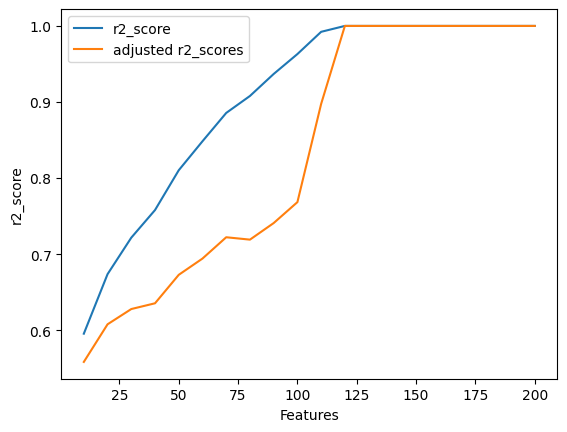

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(10,210,10)) ,r2_scores)
plt.plot(list(range(10,210,10)),adj_r2_scores)
plt.xlabel('Features')
plt.ylabel('r2_score')
plt.legend(['r2_score','adjusted r2_scores'])
plt.show()

In [ ]:
|